# ACP

Les fonctionnalités de base ACP sous Python

## Liens intéressants :
https://www.ephiquant.com/reduction-de-dimension-analyse-en-composant-principal-avec-python/

https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor3-python-scikit.pdf

https://mpra.ub.uni-muenchen.de/76653/1/MPRA_paper_76653.pdf


## Démarche ACP sur un cas connu : IRIS
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


In [4]:
import pandas as pd

In [5]:
# Création de la matrice de données à partir d'un fichier excel
df = pd.read_excel('../data/Iris.xls')
df.head(2)

Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0           1          0.2           1.4          3.5           5.1   
1           1          0.2           1.4          3.0           4.9   

  Species_name  
0       Setosa  
1       Setosa

In [6]:
# Visualiser les 5 premières lignes
print(df.head(n=5))

   Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0           1          0.2           1.4          3.5           5.1   
1           1          0.2           1.4          3.0           4.9   
2           1          0.2           1.3          3.2           4.7   
3           1          0.2           1.5          3.1           4.6   
4           1          0.2           1.4          3.6           5.0   

  Species_name  
0       Setosa  
1       Setosa  
2       Setosa  
3       Setosa  
4       Setosa  


In [7]:
df.head(5)

Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0           1          0.2           1.4          3.5           5.1   
1           1          0.2           1.4          3.0           4.9   
2           1          0.2           1.3          3.2           4.7   
3           1          0.2           1.5          3.1           4.6   
4           1          0.2           1.4          3.6           5.0   

  Species_name  
0       Setosa  
1       Setosa  
2       Setosa  
3       Setosa  
4       Setosa

### Séparation des variables quantitatives et qualitatives

In [8]:
# Sélection des variables quantitatives et conversion en forme verticale
x = df.iloc[:,1:5].values
x

array([[0.2, 1.4, 3.5, 5.1],
       [0.2, 1.4, 3. , 4.9],
       [0.2, 1.3, 3.2, 4.7],
       [0.2, 1.5, 3.1, 4.6],
       [0.2, 1.4, 3.6, 5. ],
       [0.4, 1.7, 3.9, 5.4],
       [0.3, 1.4, 3.4, 4.6],
       [0.2, 1.5, 3.4, 5. ],
       [0.2, 1.4, 2.9, 4.4],
       [0.1, 1.5, 3.1, 4.9],
       [0.2, 1.5, 3.7, 5.4],
       [0.2, 1.6, 3.4, 4.8],
       [0.1, 1.4, 3. , 4.8],
       [0.1, 1.1, 3. , 4.3],
       [0.2, 1.2, 4. , 5.8],
       [0.4, 1.5, 4.4, 5.7],
       [0.4, 1.3, 3.9, 5.4],
       [0.3, 1.4, 3.5, 5.1],
       [0.3, 1.7, 3.8, 5.7],
       [0.3, 1.5, 3.8, 5.1],
       [0.2, 1.7, 3.4, 5.4],
       [0.4, 1.5, 3.7, 5.1],
       [0.2, 1. , 3.6, 4.6],
       [0.5, 1.7, 3.3, 5.1],
       [0.2, 1.9, 3.4, 4.8],
       [0.2, 1.6, 3. , 5. ],
       [0.4, 1.6, 3.4, 5. ],
       [0.2, 1.5, 3.5, 5.2],
       [0.2, 1.4, 3.4, 5.2],
       [0.2, 1.6, 3.2, 4.7],
       [0.2, 1.6, 3.1, 4.8],
       [0.4, 1.5, 3.4, 5.4],
       [0.1, 1.5, 4.1, 5.2],
       [0.2, 1.4, 4.2, 5.5],
       [0.2, 1

In [9]:
# Sélection de la variable catégorielle et conversion en format vertical
y = df.iloc[:,5].values
y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

### Normalisation des variables quantitatives

lien vers la définition de la fonction : StandardScaler :
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02


In [10]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [11]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)
x

array([[-1.31544430e+00, -1.34022653e+00,  1.01900435e+00,
        -9.00681170e-01],
       [-1.31544430e+00, -1.34022653e+00, -1.31979479e-01,
        -1.14301691e+00],
       [-1.31544430e+00, -1.39706395e+00,  3.28414053e-01,
        -1.38535265e+00],
       [-1.31544430e+00, -1.28338910e+00,  9.82172869e-02,
        -1.50652052e+00],
       [-1.31544430e+00, -1.34022653e+00,  1.24920112e+00,
        -1.02184904e+00],
       [-1.05217993e+00, -1.16971425e+00,  1.93979142e+00,
        -5.37177559e-01],
       [-1.18381211e+00, -1.34022653e+00,  7.88807586e-01,
        -1.50652052e+00],
       [-1.31544430e+00, -1.28338910e+00,  7.88807586e-01,
        -1.02184904e+00],
       [-1.31544430e+00, -1.34022653e+00, -3.62176246e-01,
        -1.74885626e+00],
       [-1.44707648e+00, -1.28338910e+00,  9.82172869e-02,
        -1.14301691e+00],
       [-1.31544430e+00, -1.28338910e+00,  1.47939788e+00,
        -5.37177559e-01],
       [-1.31544430e+00, -1.22655167e+00,  7.88807586e-01,
      

### Mise en oeuvre de l'ACP
> Changement de repére appliqué sur la matrice de données

In [12]:
# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

In [13]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

In [14]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)

In [15]:
# Visualisation de la matrice dans le nouveau repére
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0        -2.264703         0.480027
1        -2.080961        -0.674134

In [24]:
# Constitution de la matrice finale avec la variable qualitative
# axis : {0/’index’, 1/’columns’}, default 0

finaldf = pd.concat([principaldf, df[['Species_name']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 Species_name
0        -2.264703         0.480027       Setosa
1        -2.080961        -0.674134       Setosa

> Visualisation de la matrice dans ce nouveau repère

In [17]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

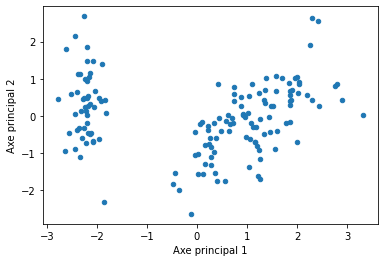

In [18]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [19]:
# Attribut pour rechercher les élements uniques d'une liste
finaldf.Species_name.unique()

array(['Setosa', 'Versicolor', 'Verginica'], dtype=object)

#### Méthode de représentation graphique

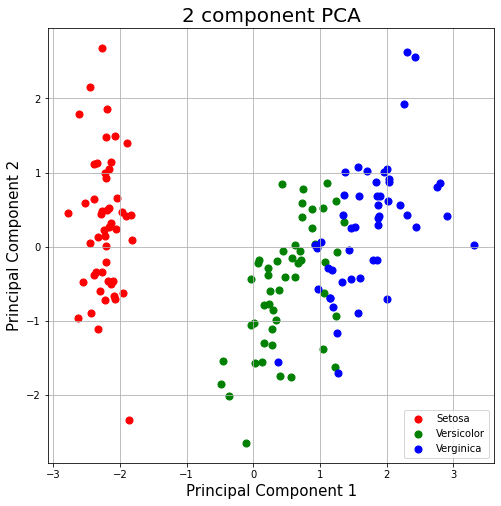

In [23]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Setosa', 'Versicolor', 'Verginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Species_name'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [18]:
# Création de la fonction Visu2D (df, target, colors, output_var)
def Visu2D (df, targets, colors, output_var):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for target, color in zip(targets,colors):
        indicesToKeep = output_var == target
        ax.scatter(df.loc[indicesToKeep, 'Axe principal 1']
                   , df.loc[indicesToKeep, 'Axe principal 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

In [19]:
#Paramètres d'entrées de la fonction Visu2D
targets = ['Setosa', 'Versicolor', 'Verginica']
colors = ['r', 'g', 'b']
output_var = df['Species_name']

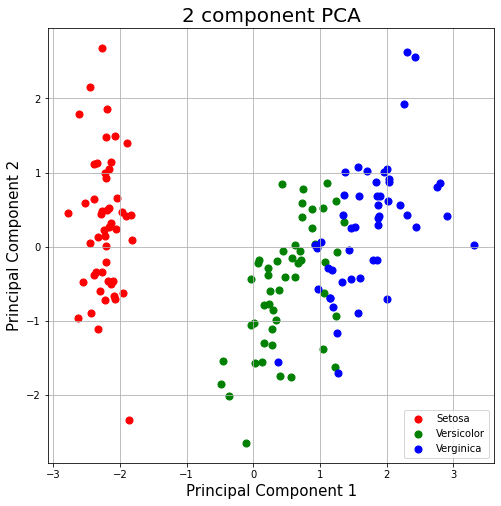

In [20]:
# Utilisation de la fonction Visu2D
Visu2D(finaldf, targets, colors, output_var)

#### Détail sur la variance : Couverture du modèle 

In [21]:
# Modèle représentatif car couvert à plus de 95%
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])